In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [8]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [10]:
df['math score'].value_counts()

math score
65     35
?      35
62     33
59     31
69     29
       ..
123     1
24      1
28      1
0       1
8       1
Name: count, Length: 85, dtype: int64

In [11]:
df.drop(df.index[df['math score'] == '?'], inplace=True)

In [12]:
df['math score'] = df['math score'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       965 non-null    object 
 1   race/ethnicity               965 non-null    object 
 2   parental level of education  965 non-null    object 
 3   lunch                        965 non-null    object 
 4   test preparation course      965 non-null    object 
 5   math score                   957 non-null    float64
 6   reading score                959 non-null    float64
 7   writing score                956 non-null    float64
dtypes: float64(3), object(5)
memory usage: 67.9+ KB


In [14]:
df['math score'].fillna(df['math score'].mean(), inplace=True)

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

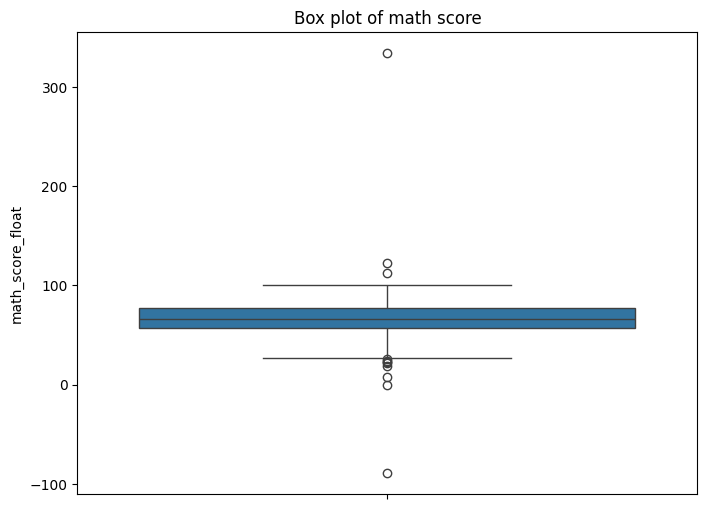

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['math score'])
plt.ylabel('math_score_float')
plt.title('Box plot of math score')
plt.show()

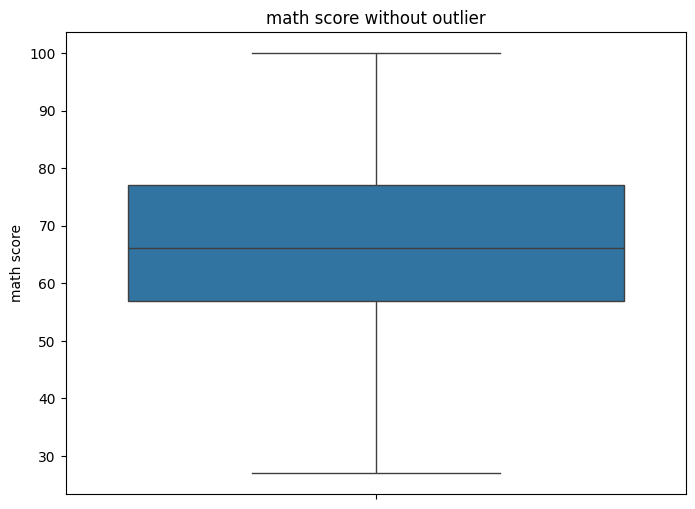

In [17]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['math score'] >= lower_limit) & (df['math score'] <= upper_limit)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['math score'])
plt.ylabel('math score')
plt.title('math score without outlier')
plt.show()
